<img src="assets/logo.png" alt="Quordle" style="width: 400px;"/>

# Quordle

If the ⬜🟨🟩 emoji look famliar to you, you may have, like most of us, been playing a lot of [Wordle][wordle].

But what if Wordle was played on a quantum computer --- and with just 5 bits?

## Rules of Wordle

In case you're not familiar with Wordle, here's how it's played: there's a five letter word you need to guess. You're given 6 tries to guess it. After each try, you're told:
- Which letters of your word are **not** in the word to guess,
- Which letters of your word **are** in the word to guess, but in the wrong position,
- Which letters of your word are in the word to guess, and in the **correct** position.

Since there's some 6000-ish (or more) 5-word letters, this means you'll need at least 12 bits to represent each guess.

## Bringing Wordle to the Quantum Wordl

### The Bloch Sphere

But now, imagine you're given 5 quantum bits: one for each letter to guess. We'll keep it simple and leave them unentangled to play nice with NISQ.

In these conditions, each qubit, by virtue of being quantum, is actually described by a full 2D-space, with some particular periodic conditions; in fact, the state of each qubit is well represented by a sphere, the so-called Bloch sphere:

![Bloch Sphere --- Smite-Meister on Wikipedia](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6b/Bloch_sphere.svg/451px-Bloch_sphere.svg.png)

The catch is that you don't observe this sphere, or the φ, or θ angles. Instead, you're only allowed to pick some direction of projection (a diameter of the sphere, in the above reprensentation), and will observe either a **yes** or **no** outcome, based on how the state is projected on the direction of measurement. This is easier to see in practice; consider that you're measuring along the blue direction, and you have a blue, a red, an orange, a purple, and a green state. Each has a different projection along our chosen direction, and corresponding probabilities:

![Overlaps](assets/bloch_overlap.png)

Furthermore, every state that lives in the red equator will have the same projection along the blue axis --- and therefore the same probability of observing `yes` or `no` --- **even though they're different states**.

There's another catch: if you estimate `p(NO)` as the relative frequency of `NO` in a number of shots, then, for a limited number of shots, there's some error margin in your estimation.

### Rules of Quordle

In Quordle, every letter lives in the Bloch sphere. The word you need to guess, then, is given by five states on five Bloch spheres.

In each round, your guess (which **must be a valid word**) will define five bases to project the different qubits onto. As a reply, you'll get the frequencies with which you observed a `no` on each qubit.

![Letters on the sphere](assets/bloch_sphere_with_letters.png)

Imagine that you're trying to guess `QUBIT`, and have guessed `CLASS`. For the first qubit, you should get a fairly high probability of observing `NO`:

![Q and S overalp](assets/qs_overlap.png)

However, there are other letters near `Q` that are compatible with that probability: 

![Other possibilities](assets/qs_alternative.png)

By trying different words and looking at the Bloch sphere and the measurements you get, try to find the hidden word in the least number of guesses! ([Psst: you'll be doing state tomography!][tomography])

**Remember the catch:** If there's a low number of shots, or a lot of noise, the probabilities reported may be inaccurate!

### Playing Quordle

You can play Quordle in the below (follow the instructions to set up the game). After each guess, you'll see a Bloch sphere, and a keyboard showing the `no` measurement frequencies for each letter. By clicking a letter, you can examine the letters in the Bloch sphere that are compatible with the observed frequency. (To help you out, letters that are likely are opaque and green, and letters that are unlikely are red.)


[wordle]: https://www.powerlanguage.co.uk/wordle/
[tomography]: https://en.wikipedia.org/wiki/Quantum_tomography

---

In [6]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [7]:
from frontend import Quordle, render_state

# Connect to Azure/IonQ

In [ ]:
from azure.quantum.qiskit import AzureQuantumProvider

with open('resource.txt') as f:
    resource_id = next(iter(f)).strip()

provider = AzureQuantumProvider (
    resource_id = resource_id,
    location = "eastus"
)

print([backend.name() for backend in provider.backends()])

In [ ]:
backend_ionq_simulator = provider.get_backend("ionq.simulator")
backend_ionq_qpu = provider.get_backend("ionq.qpu")

# Play the game!

In [8]:
%matplotlib notebook

In [14]:
game = Quordle(nshots=1024,
    only_real_words=True,
)

<IPython.core.display.Javascript object>


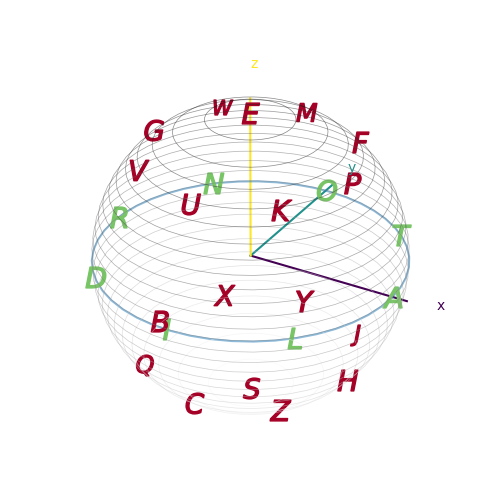

Canvas(height=100, width=410)

In [16]:
game.guess("chase")

In [17]:
game.guess("chalk")

You (probably) won!
Here's your history


Canvas(height=100, width=400)

Canvas(height=100, width=400)